In [16]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict 
%matplotlib inline

fname='elc_output.csv'
colfilter = ['Process','Period','PV']

In [17]:
a = pd.read_csv(fname, delimiter=';', usecols = colfilter)
a = a[colfilter]
a=a.groupby(['Process', 'Period']).sum() #sum values for same period, process
a=a.reset_index()
a.set_index('Period', inplace=True)

procs = a.Process.unique()
newyrs=pd.Series(range(2013,2101))
pltdict=OrderedDict()

for prc in procs:
    b=a.loc[a['Process'] == prc].reindex(newyrs,fill_value=0)
    pltdict[prc]=b['PV']
#a.to_csv('df_test.csv', sep='\t')
print(procs)

['ELCTECOA' 'ELCTEGEO' 'ELCTEHYD' 'ELCTELNG' 'ELCTENUC' 'ELCTEOIL'
 'ELCTEPVS' 'ELCTEWND' 'FTE-DIMECCSG22' 'FTE-DIMELNG17' 'FTE-DIMEPVN17'
 'FTE-DIMESOL17' 'FTE-DIMEWOFX17' 'FTE-DIMEWON17' 'PEMFC22']


Text(0, 0.5, 'Generation (GWh)')

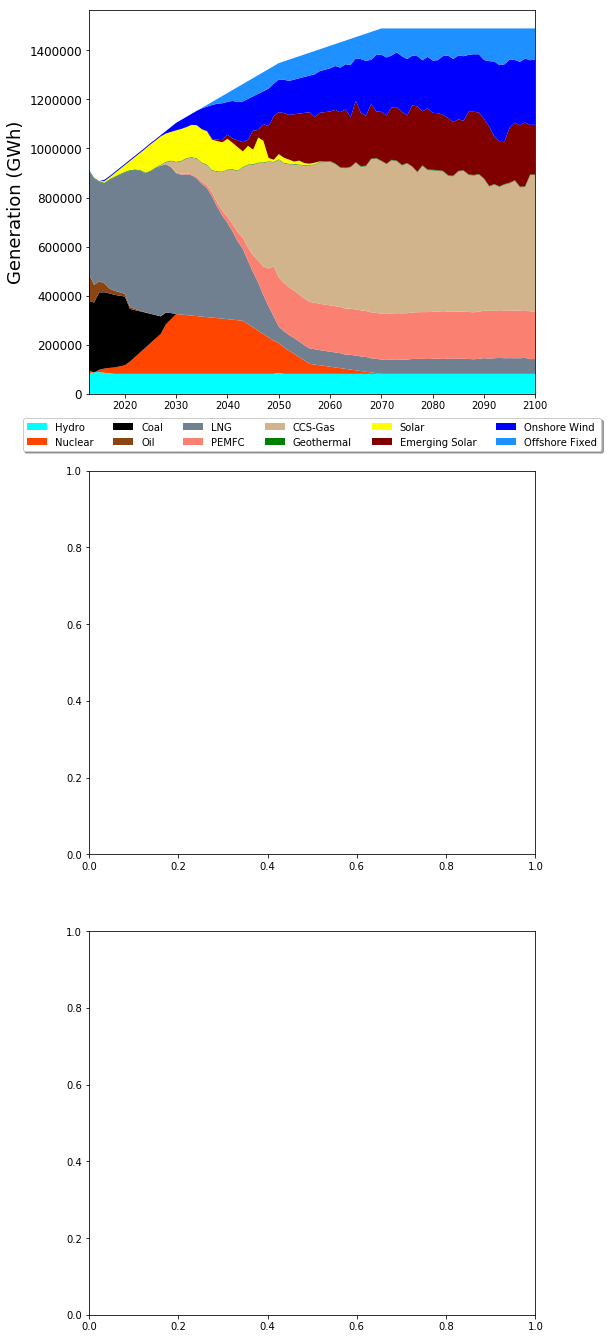

In [18]:
ordlegend=['Hydro','Nuclear',
           'Coal','Oil', 'LNG',
           'PEMFC','CCS-Gas',
           'Geothermal','Solar','Emerging Solar',
           'Onshore Wind','Offshore Fixed'#,'Offshore Floating',
           #'Storage'
          ]
colours = ['aqua','orangered',
           'black', 'saddlebrown', 'slategray',
           'salmon','tan',
           'green','yellow','maroon',
           'blue','dodgerblue'#,'teal',
          #'violet'
          ]
fig, (ax1,ax2,ax3) = plt.subplots(3,figsize=(8, 24))
pltyrs=range(2013,2101)
ax1.stackplot(pltyrs,  pltdict['ELCTEHYD'],pltdict['ELCTENUC'],
             pltdict['ELCTECOA'],pltdict['ELCTEOIL'], pltdict['ELCTELNG']+pltdict['FTE-DIMELNG17'],
              pltdict['PEMFC22'], pltdict['FTE-DIMECCSG22'],
             pltdict['ELCTEGEO'],
           pltdict['ELCTEPVS']+pltdict['FTE-DIMEPVN17'],pltdict['FTE-DIMESOL17'],
               pltdict['ELCTEWND']+pltdict['FTE-DIMEWON17'],pltdict['FTE-DIMEWOFX17'],#pltdict['FTE-DIMEWOFL19'],
              #pltdict['STGLION19'],
             labels=ordlegend, colors=colours)
ax1.tick_params(axis="x", labelsize=10)
ax1.tick_params(axis="y", labelsize=12)
ax1.set_xlim((2013, 2100))
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=6)
#ax1.set_xlabel('Years',fontsize='18')
ax1.set_ylabel('Generation (GWh)',fontsize='18')

2013         0.000000
2014         0.000000
2015         0.000000
2016         0.000000
2017     39785.755546
2018     97456.057764
2019    187100.480870
2020    324793.673218
2021    404841.622873
2022    424452.502216
2023    444030.657043
2024    476448.963810
2025    502507.737522
2026    530679.930735
2027    532729.770735
2028    533396.231535
2029    534408.999663
2030    535894.838066
2031    536468.718190
2032    536930.699174
2033    537392.680157
2034    531569.433744
2035    517867.487743
2036    498923.117621
2037    478619.758913
2038    457916.863118
2039    425483.110572
2040    392358.169998
2041    351306.648523
2042    325306.366507
            ...      
2071     42848.689523
2072     41535.948568
2073     43611.095159
2074     43720.497666
2075     44699.888609
2076     44745.104560
2077     45296.117618
2078     45839.230430
2079     46336.999361
2080     45404.251937
2081     45411.375643
2082     44329.890924
2083     44368.962108
2084     45716.948543
2085     4

In [19]:
fname='co2_emi_sources.csv'
colfilter = ['Process','Period','PV']

cdf = pd.read_csv(fname, delimiter=';', usecols = colfilter)
cdf = cdf[colfilter]
cdf=cdf.groupby(['Process', 'Period']).sum() #sum values for same period, process
cdf=cdf.reset_index()
cdf.set_index('Period', inplace=True)

procs2 = cdf.Process.unique()
pltdict2={}

for prc in procs2:
    c=cdf.loc[cdf['Process'] == prc].reindex(newyrs,fill_value=0)
    pltdict2[prc]=c['PV']
print(procs2)

['ELCCC17' 'ELCPVN17' 'ELCTECOA' 'ELCTEGEO' 'ELCTEHYD' 'ELCTELNG'
 'ELCTENUC' 'ELCTEOIL' 'ELCTEPVS' 'ELCTEWND' 'ELCWOFX17' 'ELCWON17'
 'EMSOL17' 'FTE-EALKH22' 'LNGCCS22' 'PEMFC22']


In [20]:
fname='net_cap.csv'
colfilter = ['Process','Period','PV']

capdf = pd.read_csv(fname, delimiter=';', usecols = colfilter)
capdf = capdf[colfilter]
capdf=capdf.groupby(['Process', 'Period']).sum() #sum values for same period, process
capdf=capdf.reset_index()
capdf.set_index('Period', inplace=True)

procs3 = capdf.Process.unique()
pltdict4={}

for prc in procs3:
    c=capdf.loc[capdf['Process'] == prc].reindex(newyrs,fill_value=0)
    pltdict4[prc]=c['PV']
print(procs3)

['ECALK22' 'ELCCC17' 'ELCPVN17' 'ELCTECOA' 'ELCTEGEO' 'ELCTEHYD'
 'ELCTELNG' 'ELCTENUC' 'ELCTEOIL' 'ELCTEPVS' 'ELCTEWND' 'ELCWOFX17'
 'ELCWON17' 'EMSOL17' 'LNGCCS22' 'PEMFC22']


In [21]:
ordlegend2=['Hydro','Nuclear',
           'Coal','Oil', 'LNG',
           'PEM Fuel Cell','Alkaline Electrolyzer','CCS-Gas',
           'Geothermal','Solar','Emerging Solar',
           'Onshore Wind','Offshore Fixed'
           #'Storage'
          ]
           
colours2 = ['aqua','orangered',
           'black', 'saddlebrown', 'slategray',
           'salmon','violet','tan',
           'green','yellow','maroon',
           'blue','dodgerblue'
          #'violet'
          ]
          
pltyrs2=range(2013,2101)
l2 = ax2.stackplot(pltyrs2, pltdict4['ELCTEHYD'],pltdict4['ELCTENUC'],
             pltdict4['ELCTECOA'],pltdict4['ELCTEOIL'], pltdict4['ELCTELNG']+pltdict4['ELCCC17'],
              pltdict4['PEMFC22'],pltdict4['ECALK22'],pltdict4['LNGCCS22'],
           pltdict4['ELCTEGEO'],
           pltdict4['ELCTEPVS']+pltdict4['ELCPVN17'],pltdict4['EMSOL17'],
               pltdict4['ELCTEWND']+pltdict4['ELCWON17'],pltdict4['ELCWOFX17'],
              #pltdict4['STGLION19'],
             labels=ordlegend2, colors=colours2)
ax2.set_xlim((2013, 2101))
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=7)
ax2.set_ylabel('Nameplate Capacity (GW)',fontsize='18')


ordlegend3=['Hydro','Nuclear',
           'Coal','Oil', 'LNG',
           'PEM Fuel Cell','Alkaline Electrolyzer','CCS-Gas',
           'Geothermal','Solar','Emerging Solar',
           'Onshore Wind','Offshore Fixed'
           #'Storage'
          ]
colours3 = ['aqua','orangered',
           'black', 'saddlebrown', 'slategray',
           'salmon','violet','tan',
           'green','yellow','maroon',
           'blue','dodgerblue'
          #'violet'
          ]
pltyrs3=range(2013,2101)
ax3.stackplot(pltyrs3, pltdict2['ELCTEHYD'],pltdict2['ELCTENUC'],
             pltdict2['ELCTECOA'],pltdict2['ELCTEOIL'], pltdict2['ELCTELNG']+pltdict2['ELCCC17'],
              pltdict2['PEMFC22'],pltdict2['FTE-EALKH22'],pltdict2['LNGCCS22'],
             pltdict2['ELCTEGEO'],
           pltdict2['ELCTEPVS']+pltdict2['ELCPVN17'],pltdict2['EMSOL17'],
               pltdict2['ELCTEWND']+pltdict2['ELCWON17'],pltdict2['ELCWOFX17'],
              #pltdict2['STGLION19'],    
             labels=ordlegend3, colors=colours3)
ax3.set_xlim((2013, 2100))
ax3.set_ylabel('Carbon Emissions (million t)',fontsize='18')
ax3.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=7)


fig.savefig('const_nonuc.png',bbox_inches='tight', dpi=300)